# ***GR AI-ML  REVISION TASK - RIYA KALRA***

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df=pd.read_csv("/content/Car details v3.csv")

In [ ]:
df.shape

(8128, 13)

In [ ]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


# ***1. HANDLING NULL VALUES***





In [82]:
df.replace("?",np.nan,inplace=True)
md=df.isnull()
md.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in md.columns.values.tolist():

    print (md[column].value_counts())
    print("")

name
False    8128
Name: count, dtype: int64

year
False    8128
Name: count, dtype: int64

selling_price
False    8128
Name: count, dtype: int64

km_driven
False    8128
Name: count, dtype: int64

fuel
False    8128
Name: count, dtype: int64

seller_type
False    8128
Name: count, dtype: int64

transmission
False    8128
Name: count, dtype: int64

owner
False    8128
Name: count, dtype: int64

mileage
False    7907
True      221
Name: count, dtype: int64

engine
False    7907
True      221
Name: count, dtype: int64

max_power
False    7913
True      215
Name: count, dtype: int64

torque
False    7906
True      222
Name: count, dtype: int64

seats
False    7907
True      221
Name: count, dtype: int64



In [83]:
from sklearn.impute import SimpleImputer
im=SimpleImputer(missing_values=np.nan,strategy='mean')
df['engine'] = df['engine'].astype(str).str.extract(r'(\d+)') # Changed regex to have a single capturing group
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(str).str.extract(r'(\d+)') # Changed regex to have a single capturing group
df['max_power'] = df['max_power'].astype(float)
df['mileage'] = df['mileage'].astype(str).str.extract(r'(\d+)') # Changed regex to have a single capturing group
df['mileage'] = df['mileage'].astype(float)
df['torque']=df['torque'].astype(str).str.extract(r'(\d+)')
df['torque']=df['torque'].astype(float)


In [84]:
df[['engine','max_power','mileage','torque']]=im.fit_transform(df[['engine','max_power','mileage','torque']])
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,12.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,22.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,11.0,5.0


In [85]:

im=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[['seats']]=im.fit_transform(df[['seats']]).astype("float")


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float64
 11  torque         8128 non-null   float64
 12  seats          8128 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 825.6+ KB


# ***2. PERFORMED EDA***

In [ ]:
df['name'].value_counts()

,count
name,
Maruti Swift Dzire VDI,129
Maruti Alto 800 LXI,82
Maruti Alto LXi,71
BMW X4 M Sport X xDrive20d,62
Maruti Swift VDI,61
...,...
Skoda Fabia 1.4 TDI Ambiente,1
Mahindra Scorpio VLX 2WD AT BSIII,1
Renault KWID Climber 1.0 AMT,1


In [ ]:
df['fuel'].value_counts()

,count
fuel,
Diesel,4402
Petrol,3631
CNG,57
LPG,38


In [ ]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,6766
Dealer,1126
Trustmark Dealer,236


In [ ]:
df['transmission'].value_counts()

,count
transmission,
Manual,7078
Automatic,1050


In [ ]:
df['owner'].value_counts()

,count
owner,
First Owner,5289
Second Owner,2105
Third Owner,555
Fourth & Above Owner,174
Test Drive Car,5


In [ ]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,18.953248,1458.608022,91.196481,168.187579,5.405389
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,4.012872,497.017515,35.328456,96.015042,0.948874
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,0.000000,4.000000,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,16.000000,1197.000000,68.000000,104.000000,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,19.000000,1248.000000,83.000000,160.000000,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,22.000000,1582.000000,101.250000,200.000000,5.000000


In [86]:
numericalfigures=df.select_dtypes(include=np.number)
numericalfigures.columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats'],
      dtype='object')

In [87]:
categoricalfigures=df.select_dtypes(include=[object])
categoricalfigures.columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [88]:
correlation=numericalfigures.corr()
correlation

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
year,1.000000,0.414092,-0.418006,0.312439,0.017773,0.211280,0.272792,0.010222
selling_price,0.414092,1.000000,-0.225534,-0.124701,0.453567,0.745265,0.616815,0.047135
km_driven,-0.418006,-0.225534,1.000000,-0.173339,0.203954,-0.036734,-0.003388,0.219860
mileage,0.312439,-0.124701,-0.173339,1.000000,-0.576944,-0.366932,-0.164923,-0.456350
engine,0.017773,0.453567,0.203954,-0.576944,1.000000,0.703082,0.628728,0.608750
max_power,0.211280,0.745265,-0.036734,-0.366932,0.703082,1.000000,0.768018,0.192760
torque,0.272792,0.616815,-0.003388,-0.164923,0.628728,0.768018,1.000000,0.273820
seats,0.010222,0.047135,0.219860,-0.456350,0.608750,0.192760,0.273820,1.000000


<Axes: title={'center': 'Correlation Matrix'}>

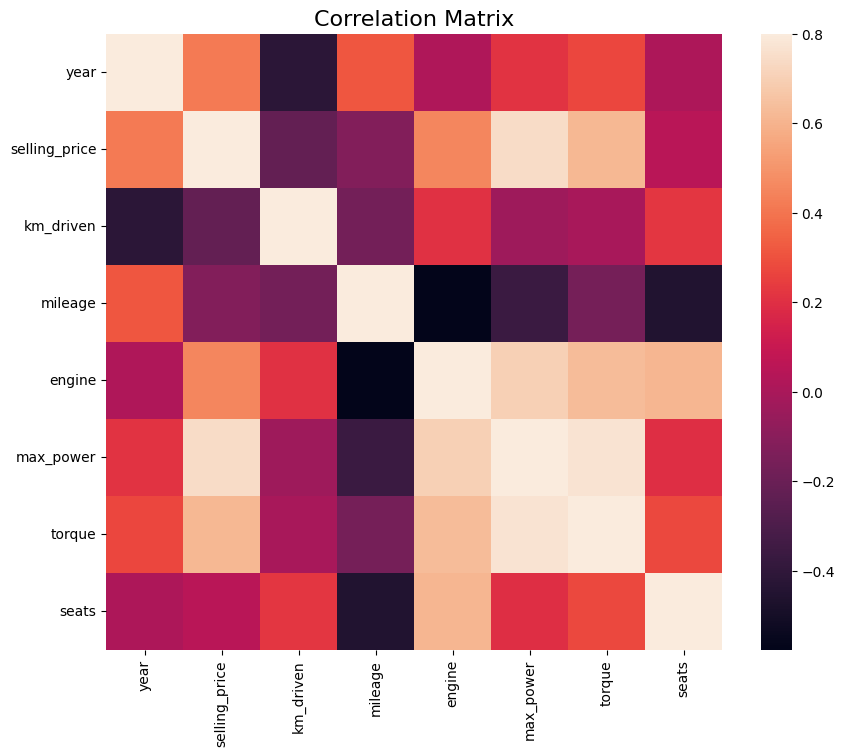

In [91]:
f,ax=plt.subplots(figsize=(10,8))
plt.title("Correlation Matrix",y=1,size=16)
sns.heatmap(correlation,vmax=.8,square=True)

In [21]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,12.0,5.0


<Axes: xlabel='mileage', ylabel='selling_price'>

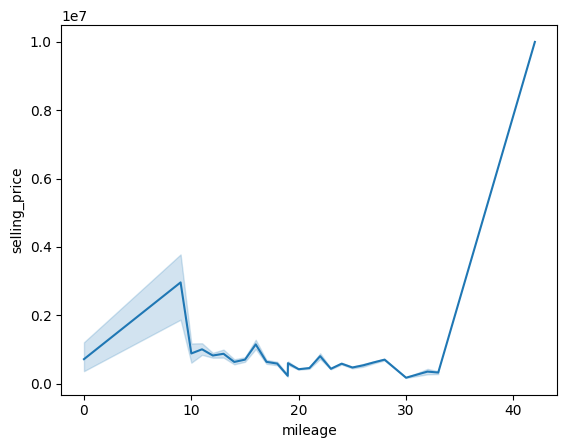

In [74]:
sns.lineplot(x='mileage',y='selling_price',data=df)

<Axes: xlabel='engine', ylabel='selling_price'>

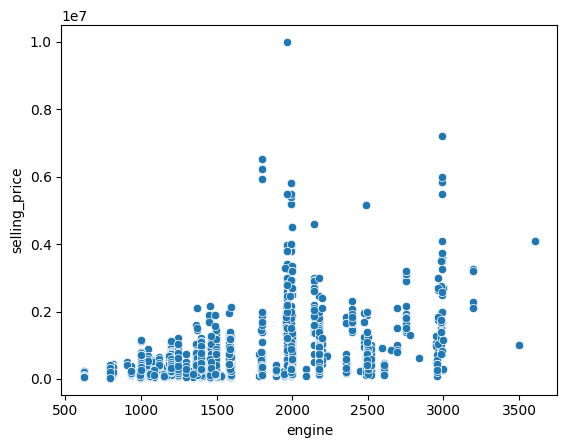

In [23]:
sns.scatterplot(x='engine',y='selling_price',data=df)

<Axes: xlabel='max_power', ylabel='selling_price'>

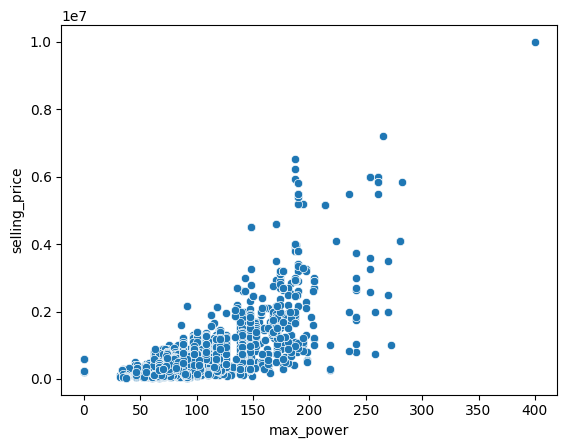

In [24]:
sns.scatterplot(x='max_power',y='selling_price',data=df)

<Axes: xlabel='seats', ylabel='selling_price'>

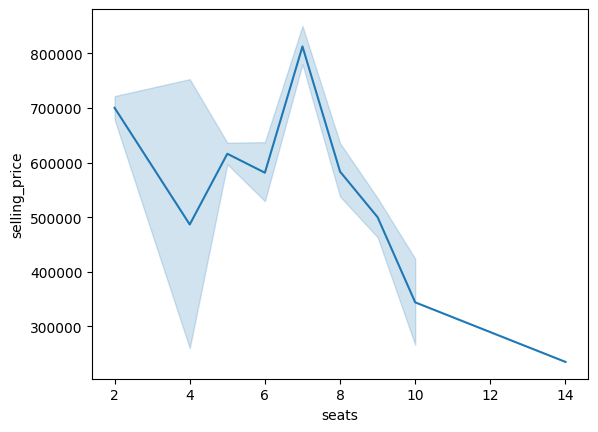

In [78]:
sns.lineplot(x='seats',y='selling_price',data=df)

<Axes: xlabel='fuel', ylabel='selling_price'>

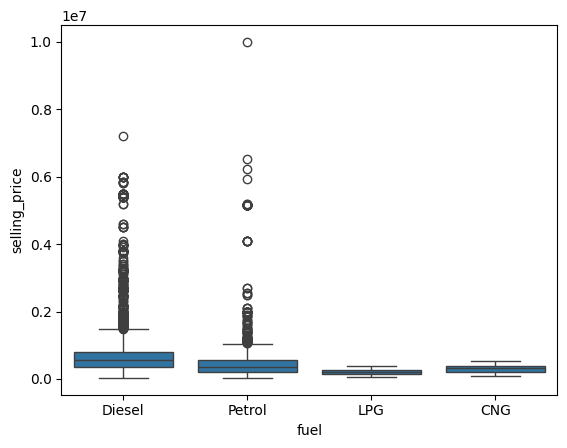

In [ ]:
sns.boxplot(x='fuel',y='selling_price',data=df)


<Axes: xlabel='selling_price', ylabel='transmission'>

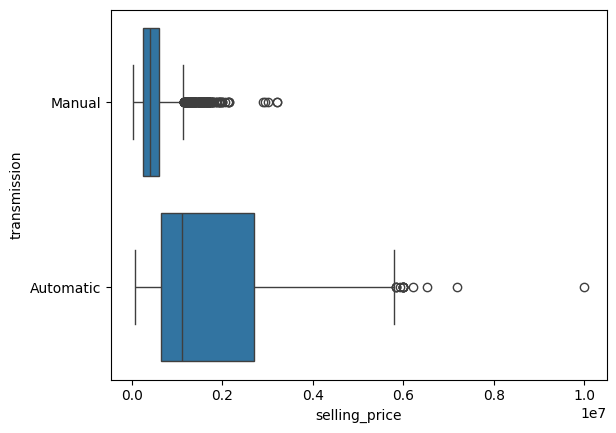

In [ ]:
sns.boxplot(x='selling_price',y='transmission',data=df)


In [54]:

new_order = ['name', 'fuel', 'seller_type', 'transmission','owner','year','km_driven','mileage','engine',	'max_power',	'torque','seats','selling_price']  # Desired column order
df = df[new_order]

# ***SPLITING OF DATASET***

In [56]:
x=df.iloc[:,5:-1]
y=df.iloc[:,-1]

In [57]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# Select only numeric features for scaling
# numeric_features = x_train.iloc[:, 8:-1].select_dtypes(include=np.number).columns # This line was causing the error
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque'] # Assuming these are your numeric columns
x_train[numeric_features] = sc.fit_transform(x_train[numeric_features])
x_test[numeric_features] = sc.transform(x_test[numeric_features])

# ***PERFORMED LINEAR REGRESSION***

In [60]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
x_test

,year,km_driven,mileage,engine,max_power,torque,seats
6271,0.546060,-0.548410,1.245346,-1.330332,-1.247208,-1.035006,5.0
5293,-0.200362,-0.514485,0.248931,-0.520694,-0.366108,-0.594306,5.0
2342,-1.444401,-0.599299,0.248931,-0.520694,-0.366108,-0.594306,5.0
7631,-0.697978,3.047723,-1.245690,2.108104,-0.309263,-1.559649,7.0
300,1.292483,-0.913113,0.498035,-0.520694,-0.280840,-0.573321,5.0
...,...,...,...,...,...,...,...
2060,0.048445,0.333660,0.498035,0.087039,0.344456,0.864200,5.0
2860,-1.195593,0.842547,-0.000172,0.012334,-0.735601,-1.591128,5.0
3525,-0.200362,0.152632,-1.743898,2.098009,0.259189,0.339558,7.0
2899,0.794868,-0.310930,0.498035,-0.922485,-0.678756,-0.814656,5.0


In [62]:
y_test

,selling_price
6271,275000
5293,300000
2342,220000
7631,650000
300,675000
...,...
2060,411000
2860,125000
3525,750000
2899,400000


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ypred=lr.predict(x_test)

print("mae- ",mean_absolute_error(y_test,ypred))
print("mse- ",mean_squared_error(y_test,ypred))
print("r2 score- ",r2_score(y_test,ypred))

mae-  289188.7574874671
mse-  237631947293.00458
r2 score-  0.6421775431869075


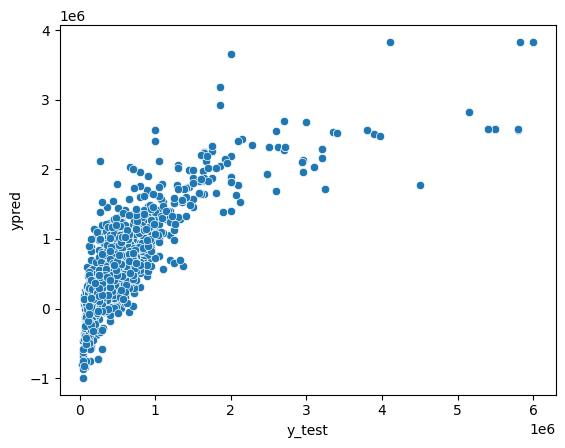

In [71]:
fig=sns.scatterplot(x=y_test,y=ypred)
fig.set(xlabel="y_test",ylabel="ypred")
plt.show()

# ***INSIGHTS***


*    Maruti Swift Dzire VDI is the most common car

*    Acc. to heat map 'year  & 'engine' are most correlated with the selling price

















## ***Extra info***

* I don't have much knowledge about linear regression but have still performed it
* Not sure whether I have done this task correctly and any feedbacks are most welcome

# ***PS. SORRY FOR A LITTLE LATE SUBMISSION :)***